# Hadamard Gate
Author: Michal Forgó \
Date: 12 August 2025 \
\
This notebook demonstrates the Hadamard gate a quantum gate that creates equal superpositions from first principles. It covers:
- Definition and matrix form of the Hadamard gate
- Applying it to basis states
- Visualizing the state on the Bloch sphere
- Performing measurement statistics

---
## 1. Setup 

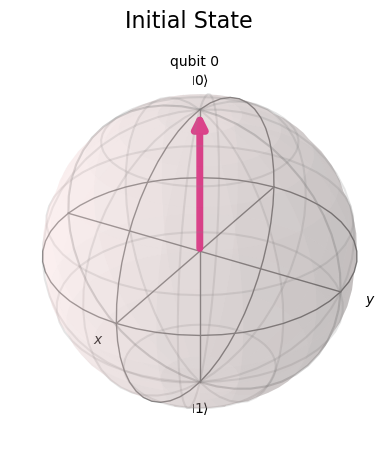

In [50]:
# Imports and simulator configuration
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
import numpy as np

# Create simulator
simulator = AerSimulator()

# Initialize
qreg_q = QuantumRegister(3, 'q')
creg_c = ClassicalRegister(1, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

qr = QuantumRegister(1, 'q')
cr = ClassicalRegister(1, 'c')
qc = QuantumCircuit(qr, cr)

plot_bloch_multivector(Statevector(qc), title="Initial State")

# 2. Define the Hadamard Gate
The Hadamard gate (H) is a fundamental quantum gate that transforms the basic qubit states |0⟩ and |1⟩ into superpositions. Specifically, it maps |0⟩ to |+⟩ and |1⟩ to |−⟩. These superposition states are crucial in quantum computing because they allow qubits to represent multiple possibilities simultaneously, enabling quantum parallelism. 

The Hadamard gate H is defined by the matrix:

$$
H = \frac{1}{\sqrt{2}}
\begin{pmatrix}
1 & 1 \\
1 & -1
\end{pmatrix}
$$

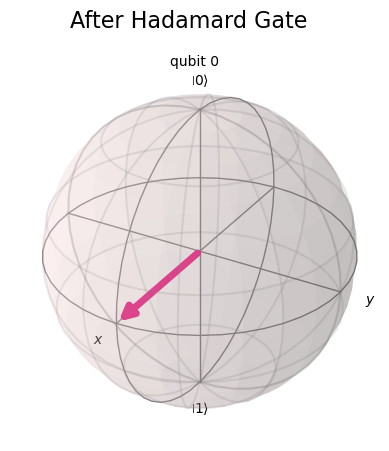

In [51]:
qc.h(qr[0])
plot_bloch_multivector(Statevector(qc), title="After Hadamard Gate")

The Hadamard gate is its own inverse, so multiplying it by itself results in the identity gate.

$$
HH = I
$$

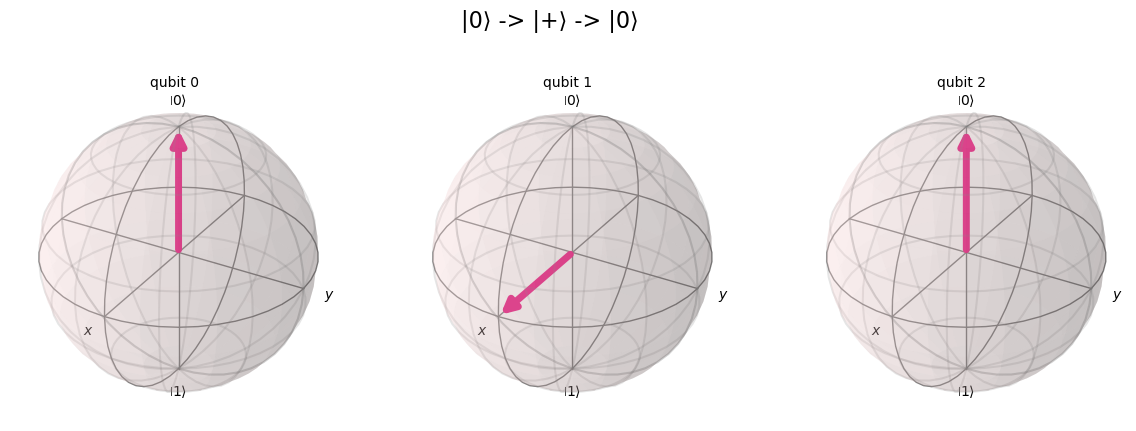

In [52]:
circuit.h(qreg_q[1])
plot_bloch_multivector(Statevector(circuit), title="|0⟩ -> |+⟩ -> |0⟩")   

## Measurement in the Hadamard Gate Example

Before measurement, applying the Hadamard gate to the state |0⟩ creates the superposition:

$$
\frac{|0⟩ + |1⟩}{\sqrt{2}}
$$

When you measure this state in the computational basis, the outcomes |0⟩ and |1⟩ both have equal probabilities of **50%**.

Running multiple measurements (called *shots*) gives a statistical distribution that reflects these probabilities — for example, approximately half of the results will be `0` and half will be `1`.


In [53]:
qc.measure(qr[0], cr[0])

sim = AerSimulator(shots=5000)
result = sim.run(qc).result()

print(result.get_counts(qc))

{'0': 2435, '1': 2565}
